<a href="https://colab.research.google.com/github/kbansal17/land_cover_land_use_lake_using_neural_network/blob/main/neural_network_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 24.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()
tif_files = list(uploaded.keys())
print("Uploaded files:", tif_files)

Saving Landsat_1990_Madurantakam.tif to Landsat_1990_Madurantakam.tif
Saving Landsat_2000_Madurantakam.tif to Landsat_2000_Madurantakam.tif
Saving Landsat_2010_Madurantakam.tif to Landsat_2010_Madurantakam.tif
Saving Sentinel2_2020_Madurantakam.tif to Sentinel2_2020_Madurantakam.tif
Uploaded files: ['Landsat_1990_Madurantakam.tif', 'Landsat_2000_Madurantakam.tif', 'Landsat_2010_Madurantakam.tif', 'Sentinel2_2020_Madurantakam.tif']



Processing Landsat_1990_Madurantakam.tif...

Classification Report for Neural Network:
              precision    recall  f1-score   support

       Water       0.95      0.92      0.94       485
  Vegetation       1.00      0.97      0.99      1722
       Urban       0.87      1.00      0.93      1508
      Barren       0.94      0.81      0.87      1222

    accuracy                           0.94      4937
   macro avg       0.94      0.93      0.93      4937
weighted avg       0.94      0.94      0.94      4937



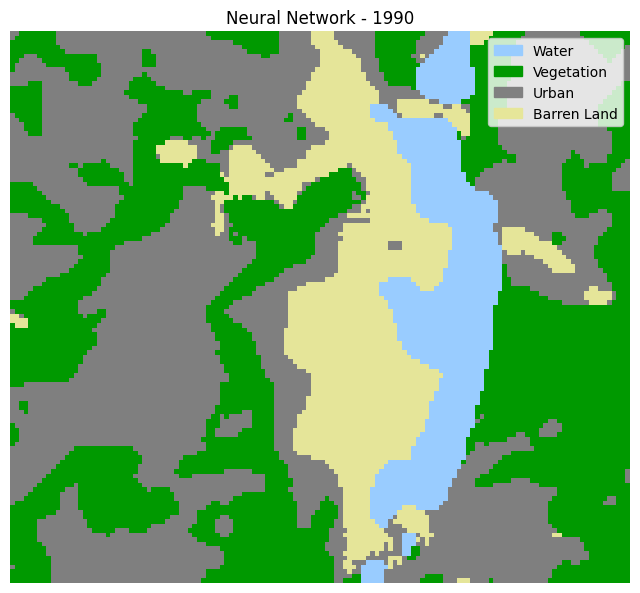


Processing Landsat_2000_Madurantakam.tif...

Classification Report for Neural Network:
              precision    recall  f1-score   support

       Water       0.82      1.00      0.90      1720
  Vegetation       0.99      1.00      0.99      1606
       Urban       0.68      1.00      0.81        81
      Barren       0.99      0.72      0.83      1530

    accuracy                           0.91      4937
   macro avg       0.87      0.93      0.88      4937
weighted avg       0.93      0.91      0.91      4937



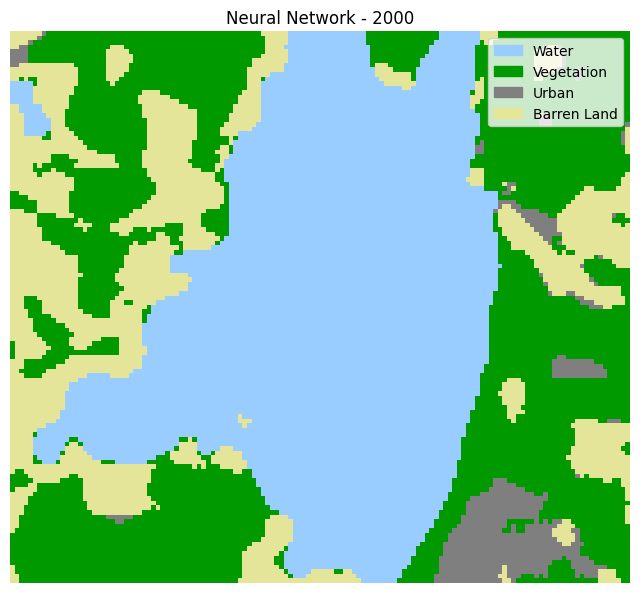


Processing Landsat_2010_Madurantakam.tif...

Classification Report for Neural Network:
              precision    recall  f1-score   support

       Water       0.95      0.99      0.97      1063
  Vegetation       0.92      1.00      0.96       835
       Urban       0.98      0.97      0.98      1176
      Barren       0.99      0.94      0.97      1863

    accuracy                           0.97      4937
   macro avg       0.96      0.98      0.97      4937
weighted avg       0.97      0.97      0.97      4937



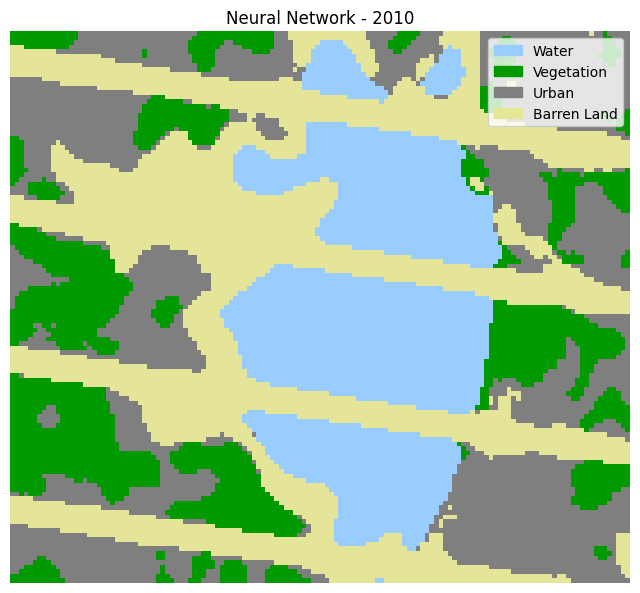


Processing Sentinel2_2020_Madurantakam.tif...

Classification Report for Neural Network:
              precision    recall  f1-score   support

       Water       0.97      0.92      0.94      3968
       Urban       0.72      0.88      0.80       930
      Barren       0.00      0.00      0.00         3

    accuracy                           0.91      4901
   macro avg       0.56      0.60      0.58      4901
weighted avg       0.92      0.91      0.92      4901



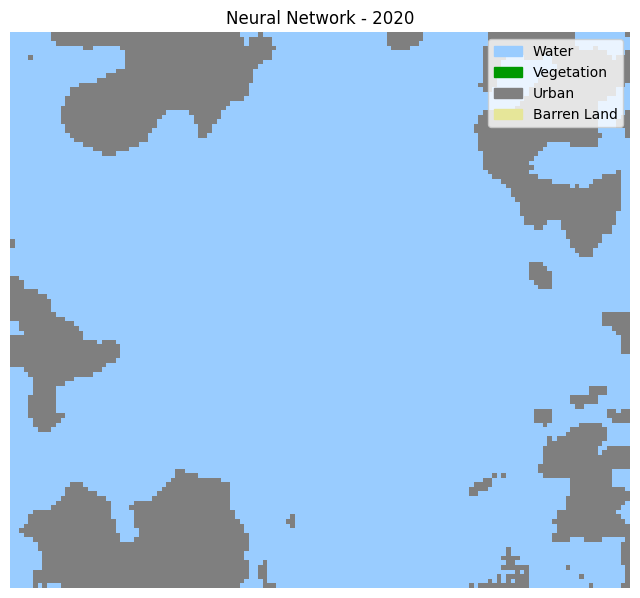

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.utils.multiclass import unique_labels

def train_and_classify_nn(features, labels, shape):
    # Remove any invalid values
    valid_mask = ~np.isnan(features).any(axis=1)
    X = features[valid_mask]
    y = labels[valid_mask]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the Neural Network classifier
    classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Adjust target names to match unique labels in y_test and y_pred
    unique_labels_in_data = unique_labels(y_test, y_pred)
    target_names = ['Water', 'Vegetation', 'Urban', 'Barren']
    filtered_target_names = [target_names[i] for i in unique_labels_in_data]

    print("\nClassification Report for Neural Network:")
    print(classification_report(y_test, y_pred, target_names=filtered_target_names))

    # Predict for the entire image
    predicted_labels = classifier.predict(features)
    return predicted_labels.reshape(shape)


# Usage Example for Neural Network Classifier
def process_image_nn(file_path):
    features, labels, shape = prepare_features(file_path)
    classified = train_and_classify_nn(features, labels, shape)
    year = file_path.split('_')[1]
    plot_classification(classified, f"Neural Network - {year}", shape)

# Process each file with Neural Network
for file_path in files:
    process_image_nn(file_path)


